# CodeSoft : DataScience InternShip
# Task 04: Sales_Prediction
# Author : Haroon Sajid

____________________

- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
- In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

## 1.0 Importing Libraries

Pandas: Data manipulation and analysis library.
<br>Numpy: Numerical computing library.
<br>Matplotlib: Data visualization library.
<br>Seaborn: Statistical data visualization library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2.0 Loading Dataset
In this section, We will import Car Purchasing Dataset

In [15]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 3.0 Basic Structure

In [16]:
# Lets check the shape of data
df.shape

(200, 4)

In [17]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
# Lets See unique values in dataset
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

## 4.0 Descriptive Statistics

In [19]:
# Lets See the statistics summary of dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## 5.0  Identify Missing Values

In [20]:
# Lets See the missing values in dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

We can see that, the Car Purchasing dataset is free of null values, ensuring complete and reliable data for analysis and modeling purposes.

## 6.0 Data Exploration(EDA)

In [21]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

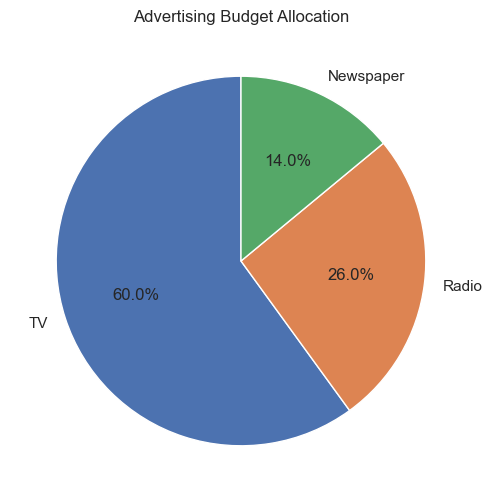

In [28]:
# Lets Create a pie chart
sizes = [300, 130, 70] 
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels = ['TV', 'Radio', 'Newspaper'], autopct='%1.1f%%', startangle=90)
plt.title('Advertising Budget Allocation')
plt.show()

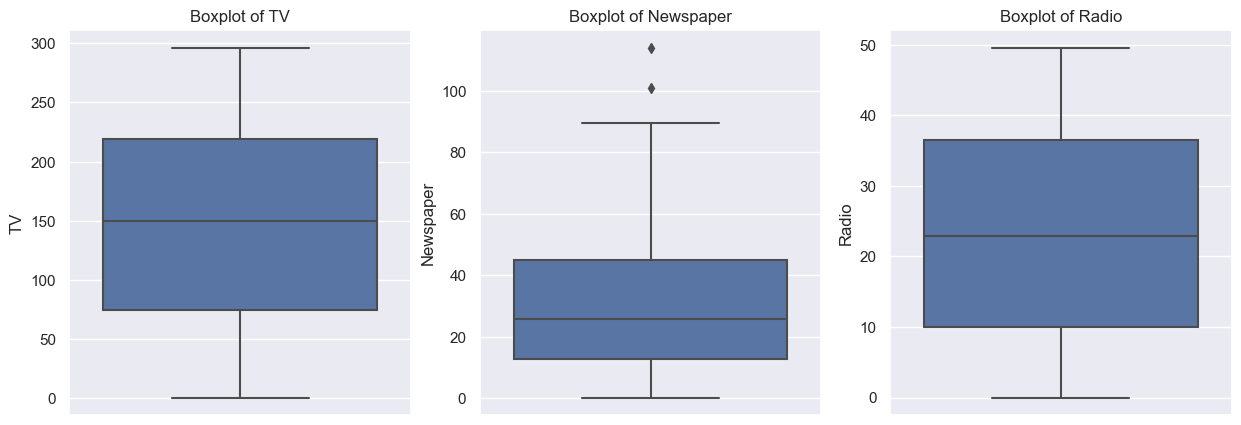

In [29]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Create a boxplot for 'TV'
sns.boxplot(y=df['TV'], ax=axs[0])
axs[0].set_title('Boxplot of TV')

# Create a boxplot for 'Newspaper'
sns.boxplot(y=df['Newspaper'], ax=axs[1])
axs[1].set_title('Boxplot of Newspaper')

# Create a boxplot for 'Radio'
sns.boxplot(y=df['Radio'], ax=axs[2])
axs[2].set_title('Boxplot of Radio')

# Display the plot
plt.show();


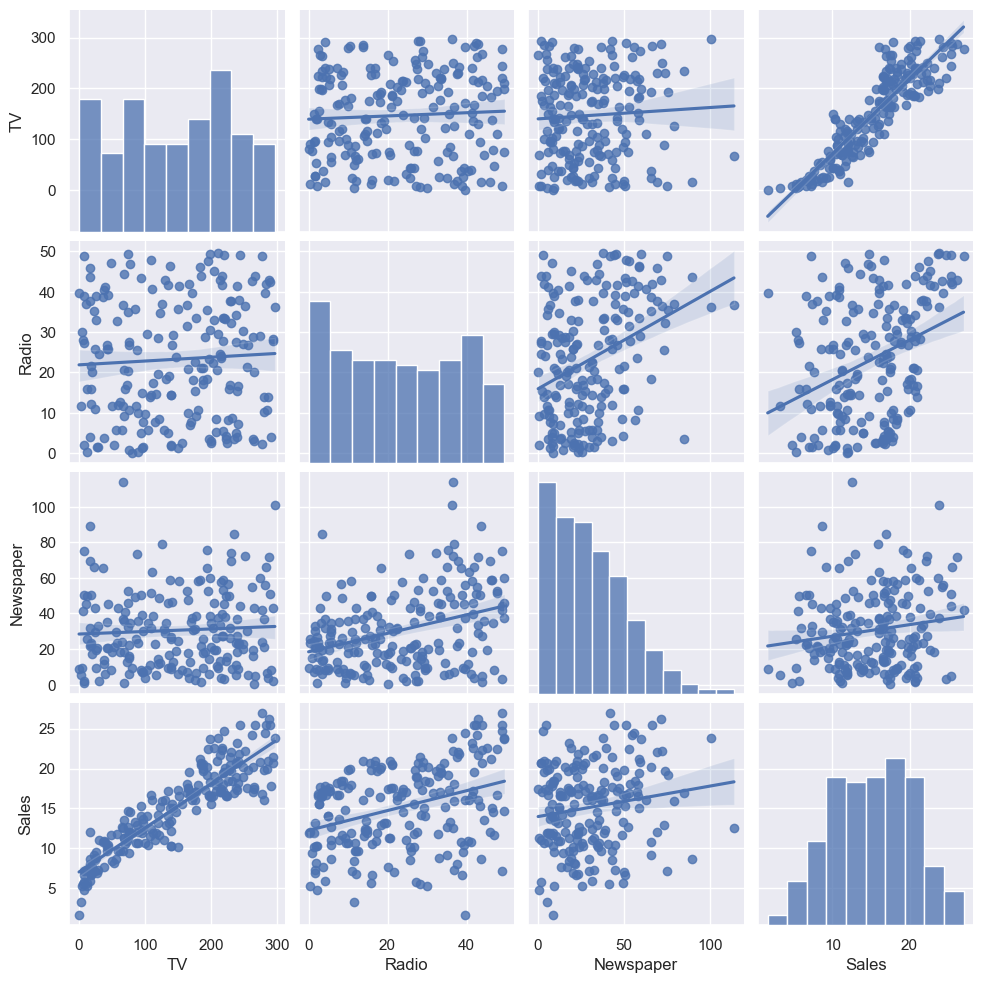

In [30]:
# Lets Create a pair plot to explore relationships between variables
sns.pairplot(data = df, kind='reg')
plt.show()

In [31]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

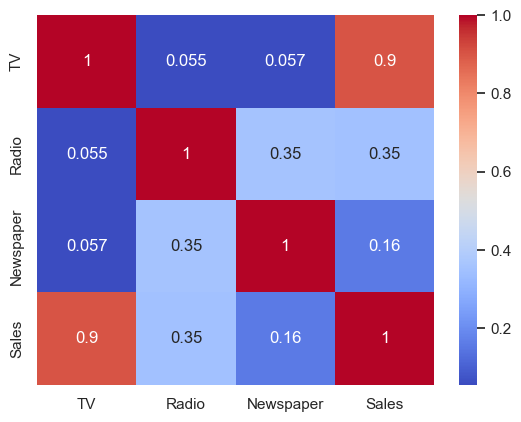

In [32]:
# Lets Create a heatmap to see the correlation between variables
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot = True)
plt.show()

### Observation 01

We can See that pairplot and heatmap reveal a strong correlation between TV and Sales. This suggests that TV is a significant feature for predicting Sales. Therefore, a simple linear regression model using TV as the feature variable is appropriate due to the linear relationship observed.

## 7.0 Model Building

In [33]:
# Import necessary libraries from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### 7.1 Simple Linear Regression
Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables: One variable, denoted x, is regarded as the predictor, explanatory, or independent variable. The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

####  Create Independent and Dependent Variables

In [34]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df[['Sales']]
y = df['Sales']

####  Data Preprocessing

In [35]:
# Lets do preprocessing on X dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X = pd.DataFrame(df_scaled, columns=X.columns)
X.head()

,Sales
0,0.807087
1,0.346457
2,0.409449
3,0.586614
4,0.641732


####  Train Test Split Data

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.2, random_state= 30)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(160, 1) (160,)
(40, 1) (40,)


####  Model Training & Performance

In [37]:
# Lets Create a linear regression model
lr = LinearRegression()
# Train the model using the training sets
lr.fit(xtrain, ytrain)

y_train_pred = lr.predict(xtrain)
y_test_pred = lr.predict(xtest)

r2_train = r2_score(ytrain, y_train_pred)
r2_test = r2_score(ytest, y_test_pred)
print("train_r2_score:",r2_train)
print("test_r2_score :",r2_test)

train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("MSE of train:",train_mse)
print("MSE of test :",test_mse)

train_r2_score: 1.0
test_r2_score : 1.0
MSE of train: 4.7146765038599534e-30
MSE of test : 4.3781780239766154e-30


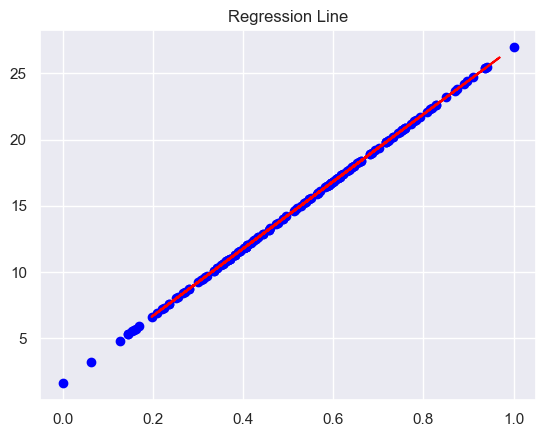

In [49]:
# Lets Create a scatter plot with xtrain and ytrain
# Plot the regression line using xtest and y_pred
plt.scatter(xtrain, ytrain, color='blue')
plt.plot(xtest, y_test_pred, color='red')
plt.title('Regression Line')
plt.show()

### 7.2 MultiLinear Regression
Multilinear Regression is an extension of Simple Linear Regression that allows for the prediction of a response variable based on the value of two or more predictor variables. It not only considers multiple predictors, but also explores the relationship between these predictors and the response.

####  Create Independent and Dependent Variables

In [50]:
# Lets Create 'X' Independent variable and y dependent variable;
X_mr= df.drop(columns = ['Sales'])
y_mr = df['Sales']

####  Data Preprocessing

In [51]:
# Lets do preprocessing on X dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X_mr)

# Convert the scaled array back to a DataFrame
X = pd.DataFrame(df_scaled, columns=X_mr.columns)
X.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


####  Train Test Split Data

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(X_mr,y_mr, test_size= 0.3, random_state= 30)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(140, 3) (140,)
(60, 3) (60,)


####  Model Training & Performance

In [53]:
# Lets Create a linear regression model
lr = LinearRegression()
# Train the model using the training sets
lr.fit(xtrain, ytrain)

y_train_pred = lr.predict(xtrain)
y_test_pred = lr.predict(xtest)

r2_train = r2_score(ytrain, y_train_pred)
r2_test = r2_score(ytest, y_test_pred)
print("train_r2_score:",r2_train)
print("test_r2_score :",r2_test)

train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("MSE of train:",train_mse)
print("MSE of test :",test_mse)

train_r2_score: 0.8936484319605036
test_r2_score : 0.9119365079893468
MSE of train: 2.852495071181332
MSE of test : 2.5574919892944066


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


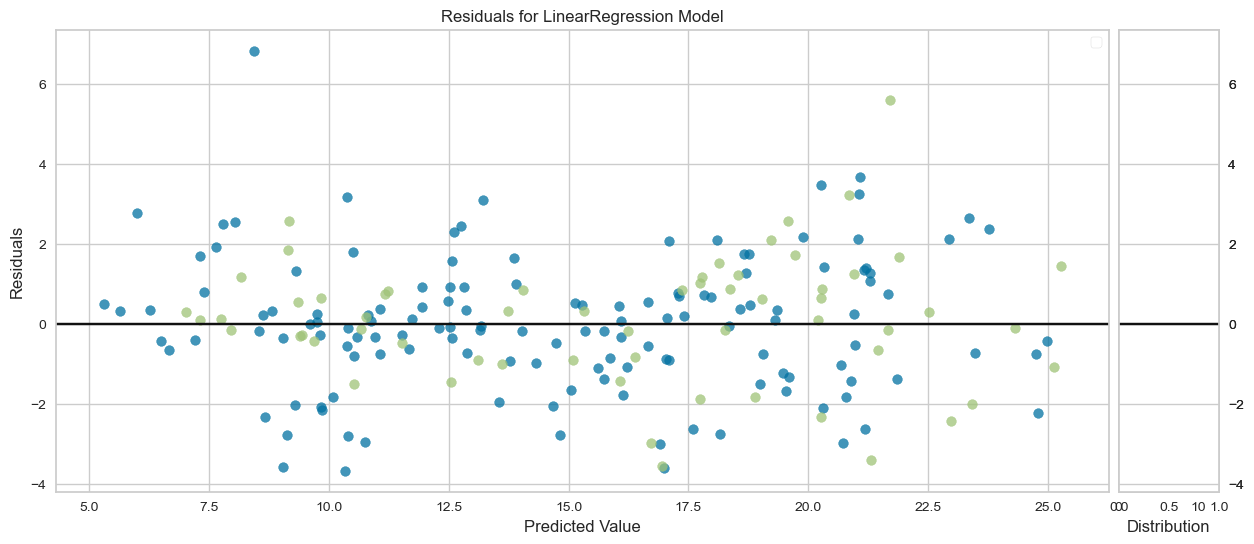

In [54]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(lr)
visualizer.fit(xtrain.values, ytrain.values)
visualizer.score(xtest.values, ytest.values)
visualizer = ResidualsPlot(lr)
visualizer.poof();

### 7.2 Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. It provides a way to model a relationship between two or more features where the dependent variable has a non-linear correlation to the independent variables.

In [55]:
poly_features = PolynomialFeatures(degree=2)
xtrain.shape

(140, 3)

In [56]:
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(xtrain)
X_train_poly.shape

(140, 10)

In [57]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, ytrain)

LinearRegression()

In [58]:
# predicting training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# predicting test data-set
X_test_poly=poly_features.fit_transform(xtest)
y_test_predict = poly_model.predict(X_test_poly)
# evaluating the model on training dataset
r2_train = r2_score(ytrain, y_train_predicted)
# evaluating the model on test dataset
r2_test = r2_score(ytest, y_test_predict)
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.9281435793729242
The r2 score for testing set is:  0.9377636521811301


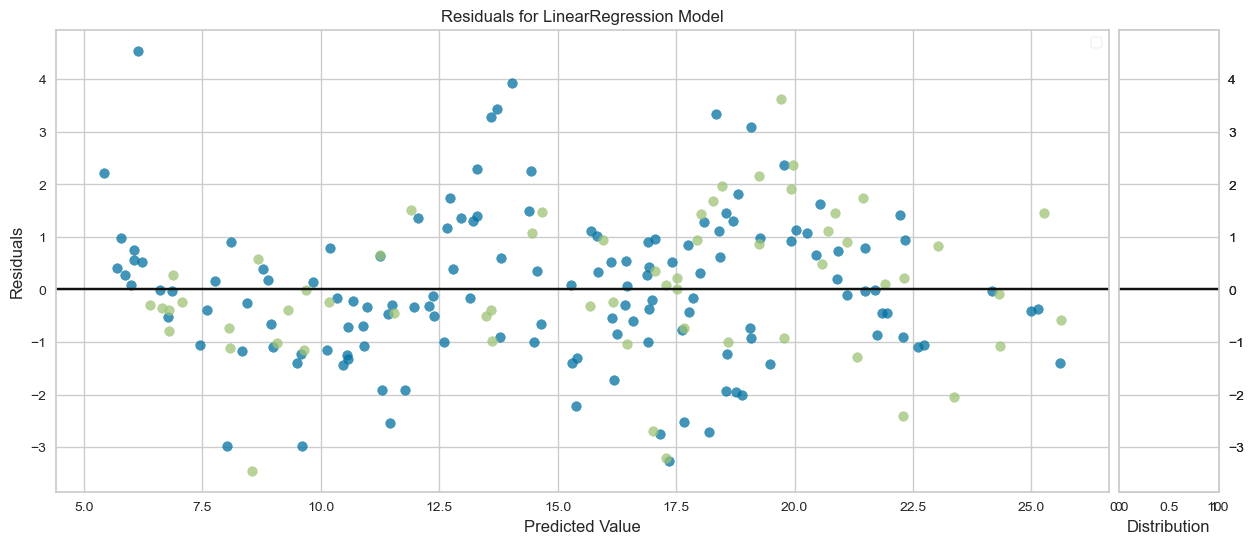

In [59]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(poly_model)
visualizer.fit(X_train_poly, ytrain.values)
visualizer.score(X_test_poly, ytest.values)
visualizer = ResidualsPlot(lr)
visualizer.poof();

## 8.0 Model Complexity vs Performance

In [60]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
mse_train=[]
mse_test=[]
mse_cv=[]
r2_train=[]
r2_test=[]
r2_cv=[]
for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    
    mse_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5,scoring=make_scorer(mean_squared_error))
    r2_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5)
    
    r2_train.append(r2_score(ytrain, y_tr_predicted))
    r2_test.append(r2_score(ytest, y_tst_predict))
    r2_cv.append(r2_cv_scores.mean())
    
    mse_train.append(mean_squared_error(ytrain, y_tr_predicted))
    mse_test.append(mean_squared_error(ytest, y_tst_predict))
    mse_cv.append(mse_cv_scores.mean())

### Comparison of R2 Score

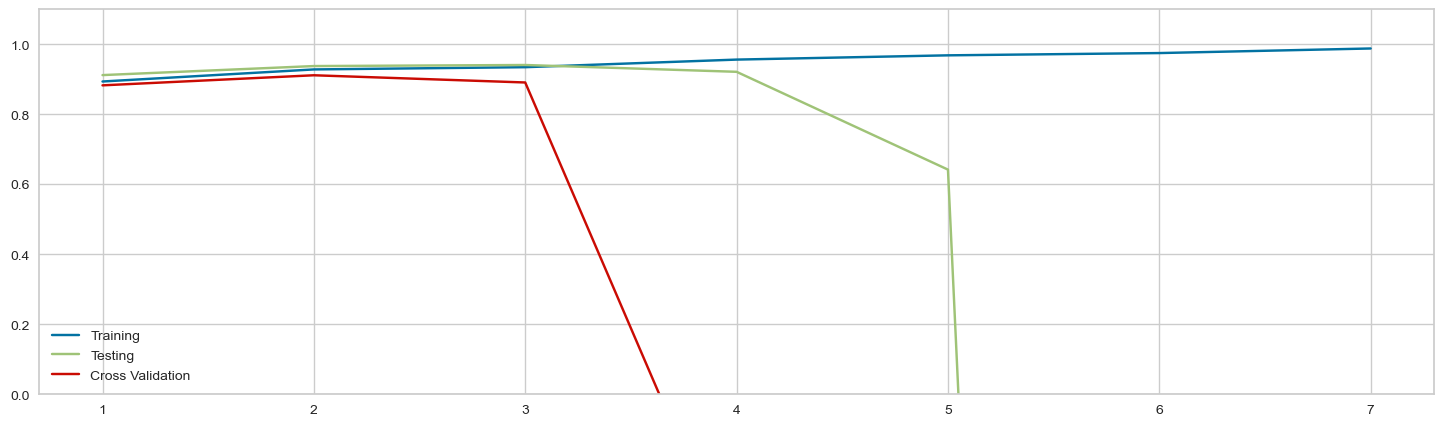

In [61]:

plt.figure(figsize=(18,5))
sns.lineplot(x=list(range(1,8)), y=r2_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=r2_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=r2_cv, label='Cross Validation')
plt.ylim(0,1.1)
plt.show()

### Comparison of Mean Squared Error

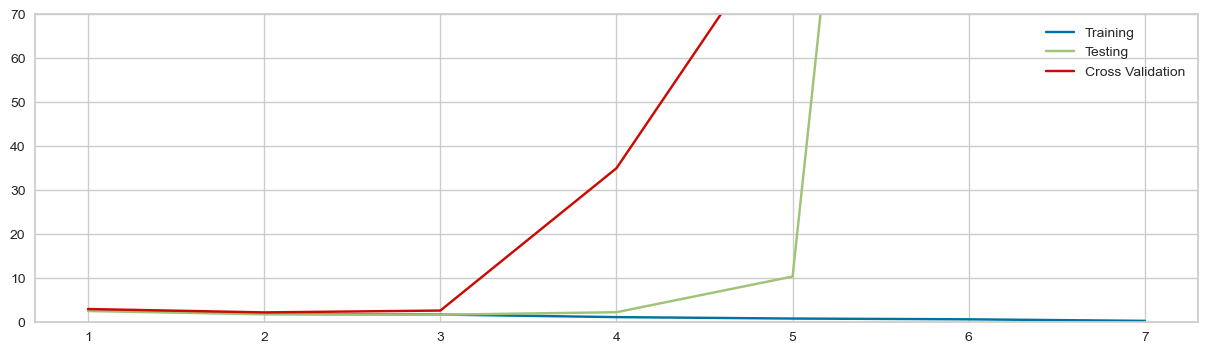

In [62]:
plt.figure(figsize=(15,4))
sns.lineplot(x=list(range(1,8)), y=mse_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=mse_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=mse_cv, label='Cross Validation')
plt.ylim(0,70)
plt.show();

________________________